In [1]:
from utilities import *
from manualspeciesabundances import *
from astropy.table import Table
import sys
import glob
from spectral_cube import SpectralCube as sc
import pdb
import math
import matplotlib.pyplot as plt
from astropy.io import fits
import pickle
from pyspeckit.spectrum.models import lte_molecule
from astropy.modeling import models
import matplotlib as mpl
from astroquery.linelists.cdms import CDMS

In [2]:
source='DSi'
molecule=' C2H5OH '
incompleteqrot=[' C2H5OH ']
linelist=linelistdict[molecule]
mastervelocities=masterdopplershifts[molecule]
cdms_catdir=CDMS.get_species_table()
if source == 'SgrB2S':
    z_sgrb2s=0.0002223
elif source in mastervelocities.keys():
    dopplershift_z=(mastervelocities[source]/(c.to('km s-1'))).to('').value
else:
    dopplershift_z=ch3oh_dopplershifts[source]
dopplershift_kms=dopplershift_z*c.to('km s-1')
truesubplotwidth=10*u.km/u.s
background=13.372*u.K

In [3]:
images=['spw0','spw1','spw2','spw3']
print(f'Source: {source}')
fnum=fields[source]
pixcoords=pixdict[source]
minicubedir=minicube_end[fnum]
z=dopplershift_z#ch3oh_dopplershifts[source]

cubelocs=f'/orange/adamginsburg/sgrb2/2017.1.00114.S/desmond/SgrB2DSminicubes/{source}/{minicubedir}*.fits'
cubes=glob.glob(cubelocs)
cubes.sort()

reorgpath=f'/blue/adamginsburg/d.jeff/SgrB2DSreorg/field{fnum}/CH3OH/{source}/'+ch3oh_sourcedict[source]
mastertxttablepath=reorgpath+'mastereuksqnsfreqsdegens.fits'
fwhmpath=glob.glob(reorgpath+'*fwhm*')[0]
nch3ohpath=reorgpath+'bootstrap_ntot_intstd_boostrap1000_nonegativeslope.fits'
picklepath=reorgpath+'ch3ohlinesdict.obj'
trotmappath=reorgpath+'bootstrap_texmap_3sigma_allspw_withnans_weighted.fits'
fluxerrorpath=reorgpath+'errorimgs/std/*.fits'

openfile=open(picklepath,'rb')
pklch3oh=pickle.load(openfile)
sourcefwhm=fits.getdata(fwhmpath)*u.km/u.s
trotmap=fits.getdata(trotmappath)*u.K
measTrot=trotmap[pixcoords[0],pixcoords[1]]
measlinewidth=sourcefwhm[pixcoords[0],pixcoords[1]]
fluxerrorcubes=glob.glob(fluxerrorpath)
fluxerrorcubes.sort()

numdetections=0
datatoplot=[]
modelstoplot=[]
potentialcontaminants=[]

Source: DSi


Gathering  C2H5OH  lines from spw0
 C2H5OH  has an incomplete partition function
Estimating by linear fit to log-log Qrot/T relation

13(0,13)(1)-12(1,12)(1) chi-squared: 15.387044511476482
13(0,13)(1)-12(1,12)(1) goodness of fit: 2.002394573230516


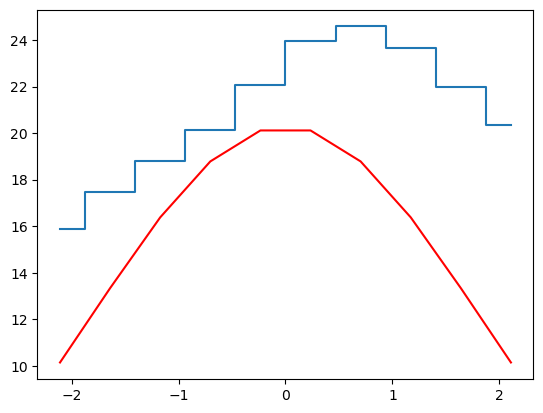


13(1,13)(1)-12(0,12)(1) chi-squared: 28.703739943493392
13(1,13)(1)-12(0,12)(1) goodness of fit: 0.1605739053539601


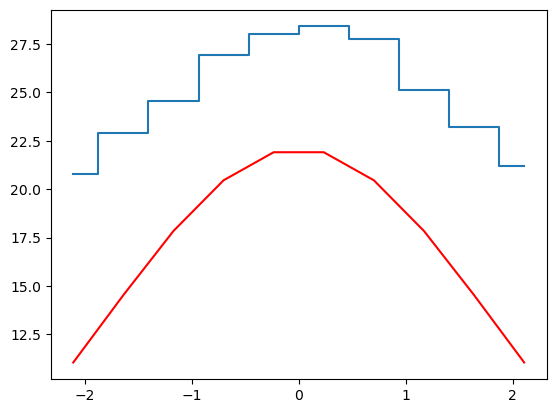

Gathering  C2H5OH  lines from spw1
 C2H5OH  has an incomplete partition function
Estimating by linear fit to log-log Qrot/T relation

21(5,16)(2)-21(4,17)(2) chi-squared: 3.8153867017600267
21(5,16)(2)-21(4,17)(2) goodness of fit: 4.653813031819725
Potential contaminant present over 21(5,16)(2)-21(4,17)(2) @ 218514.2000642379 MHz

35(4,31)(2)-35(3,32)(2) chi-squared: 11.235620938886013
35(4,31)(2)-35(3,32)(2) goodness of fit: 2.675814338340203


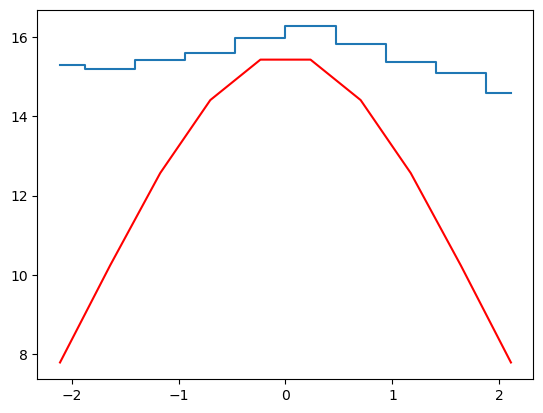


30(3,27)(2)-30(2,28)(2) chi-squared: 259.933463155483
30(3,27)(2)-30(2,28)(2) goodness of fit: 15.250756046358582
Potential contaminant present over 30(3,27)(2)-30(2,28)(2) @ 219133.3136619588 MHz
Gathering  C2H5OH  lines from spw2
 C2H5OH  has an incomplete partition function
Estimating by linear fit to log-log Qrot/T relation

13(2,11)(0)-12(2,10)(0) chi-squared: 4.572765162171368
13(2,11)(0)-12(2,10)(0) goodness of fit: 4.656987960261827
Potential contaminant present over 13(2,11)(0)-12(2,10)(0) @ 230630.0158694093 MHz

16(5,11)(2)-16(4,12)(2) chi-squared: 24.478783446032196
16(5,11)(2)-16(4,12)(2) goodness of fit: 0.8132812686559543


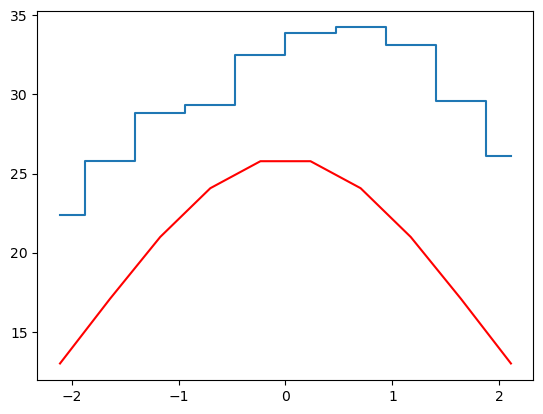


14(0,14)(2)-13(1,13)(2) chi-squared: 10.789265921043249
14(0,14)(2)-13(1,13)(2) goodness of fit: 3.164979840677865
Potential contaminant present over 14(0,14)(2)-13(1,13)(2) @ 230948.7823694396 MHz

21(5,17)(2)-21(4,18)(2) chi-squared: 23.574725059670207
21(5,17)(2)-21(4,18)(2) goodness of fit: 0.8146000282698216


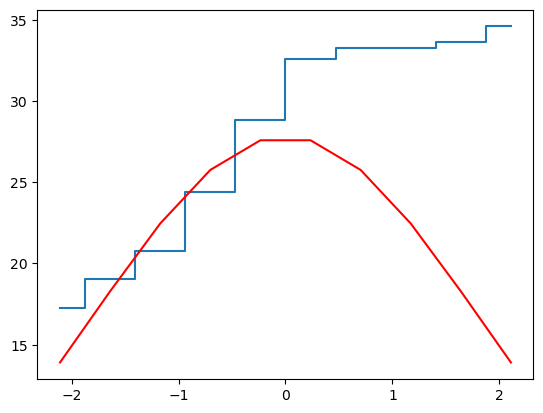


20(5,16)(2)-20(4,17)(2) chi-squared: 35.14720734754388
20(5,16)(2)-20(4,17)(2) goodness of fit: 0.7030306991706459


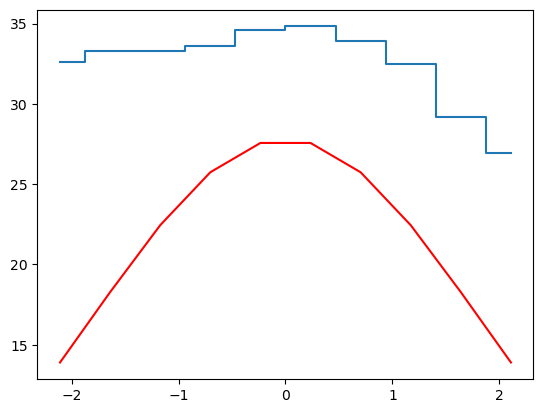


14(1,14)(0)-13(1,13)(0) chi-squared: 6.238984635721927
14(1,14)(0)-13(1,13)(0) goodness of fit: 4.277832759481887
Potential contaminant present over 14(1,14)(0)-13(1,13)(0) @ 231626.01594629427 MHz

19(5,15)(2)-19(4,16)(2) chi-squared: 18.22696909652914
19(5,15)(2)-19(4,16)(2) goodness of fit: 1.77253999482242


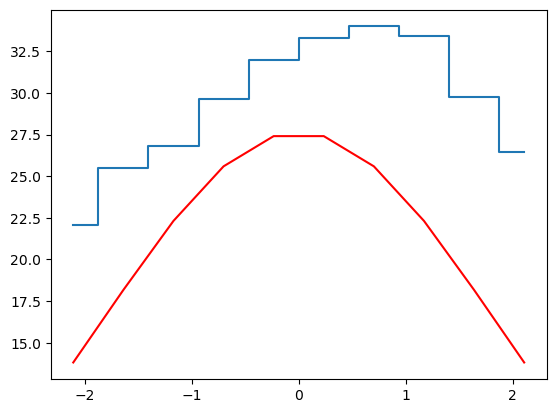


22(5,18)(2)-22(4,19)(2) chi-squared: 64.62843087223385
22(5,18)(2)-22(4,19)(2) goodness of fit: 3.6879730282049232
Potential contaminant present over 22(5,18)(2)-22(4,19)(2) @ 231747.30847256028 MHz

18(5,14)(2)-18(4,15)(2) chi-squared: 20.60009030378366
18(5,14)(2)-18(4,15)(2) goodness of fit: 1.3915129927604042


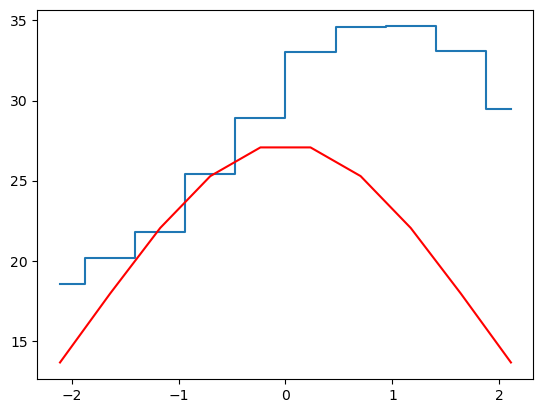


15(5,10)(2)-15(4,11)(2) chi-squared: 83.24639414207189
15(5,10)(2)-15(4,11)(2) goodness of fit: 5.092958773318049
Potential contaminant present over 15(5,10)(2)-15(4,11)(2) @ 232033.04446542912 MHz
Gathering  C2H5OH  lines from spw3
 C2H5OH  has an incomplete partition function
Estimating by linear fit to log-log Qrot/T relation

23(5,19)(2)-23(4,20)(2) chi-squared: 3.1156752383384325
23(5,19)(2)-23(4,20)(2) goodness of fit: 5.313982367168092
Potential contaminant present over 23(5,19)(2)-23(4,20)(2) @ 232275.6681108423 MHz

17(5,13)(2)-17(4,14)(2) chi-squared: 9.891346219905097
17(5,13)(2)-17(4,14)(2) goodness of fit: 3.2333718732420893
Potential contaminant present over 17(5,13)(2)-17(4,14)(2) @ 232361.97928980069 MHz

14(0,14)(0)-13(0,13)(0) chi-squared: 11.162978319979171
14(0,14)(0)-13(0,13)(0) goodness of fit: 2.9561106538234494


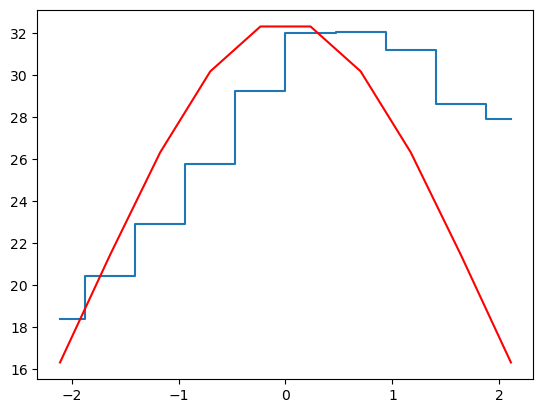


14(1,14)(1)-13(1,13)(1) chi-squared: 30.86104715862061
14(1,14)(1)-13(1,13)(1) goodness of fit: 0.04609135012074361


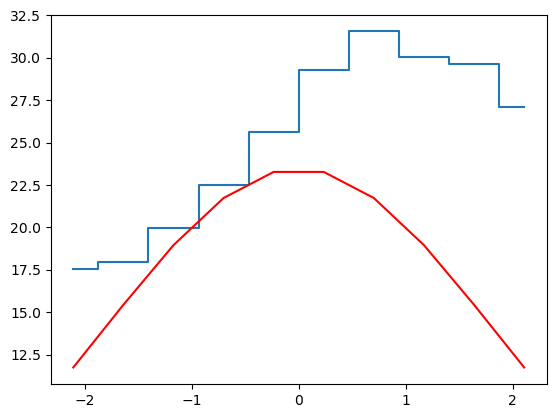


16(5,12)(2)-16(4,13)(2) chi-squared: 14.231169925664032
16(5,12)(2)-16(4,13)(2) goodness of fit: 2.4752389119692406


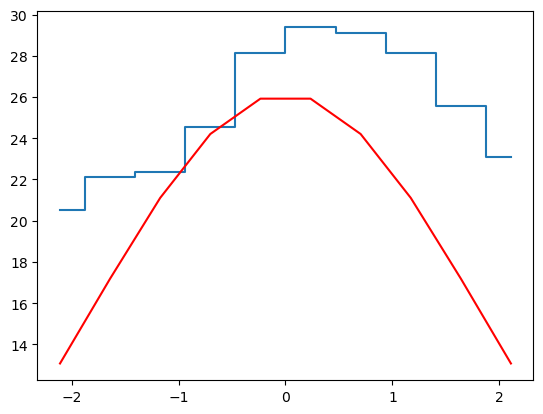


14(5,9)(2)-14(4,10)(2) chi-squared: 30.48400094811443
14(5,9)(2)-14(4,10)(2) goodness of fit: 0.0020487373915045737


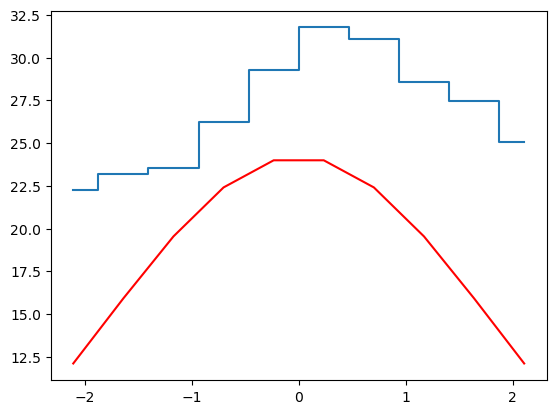


24(5,20)(2)-24(4,21)(2) chi-squared: 590.1652886564221
24(5,20)(2)-24(4,21)(2) goodness of fit: 26.545689800592086
Potential contaminant present over 24(5,20)(2)-24(4,21)(2) @ 233165.53206569658 MHz

15(5,11)(2)-15(4,12)(2) chi-squared: 140.35375130275665
15(5,11)(2)-15(4,12)(2) goodness of fit: 8.944078200958874
Potential contaminant present over 15(5,11)(2)-15(4,12)(2) @ 233172.49018219585 MHz

13(5,8)(2)-13(4,9)(2) chi-squared: 72.1949435287474
13(5,8)(2)-13(4,9)(2) goodness of fit: 4.205984636784439
Potential contaminant present over 13(5,8)(2)-13(4,9)(2) @ 233527.97500912886 MHz

14(5,10)(2)-14(4,11)(2) chi-squared: 47.73551895103678
14(5,10)(2)-14(4,11)(2) goodness of fit: 1.960678524733936


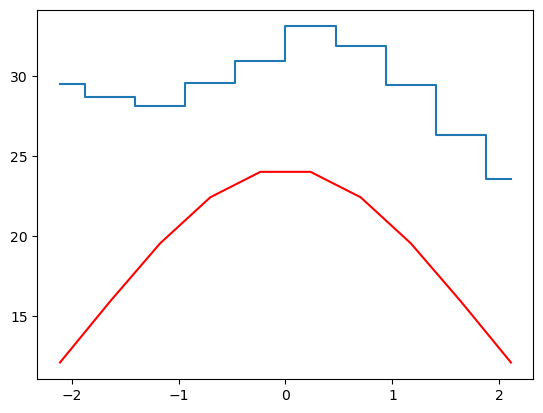


13(5,9)(2)-13(4,10)(2) chi-squared: 30.16064406796064
13(5,9)(2)-13(4,10)(2) goodness of fit: 0.04357161280134214


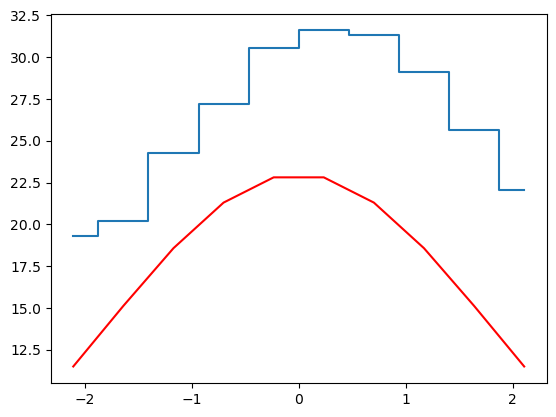


12(5,7)(2)-12(4,8)(2) chi-squared: 23.469407170629747
12(5,7)(2)-12(4,8)(2) goodness of fit: 0.9590589515683297


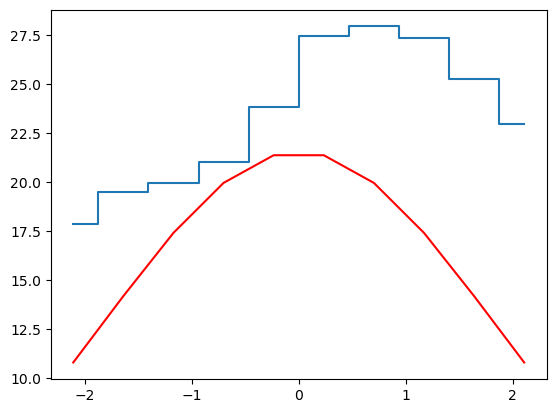

In [44]:
for path,spwname,stdimage in zip(cubes,images,fluxerrorcubes):
    print(f'Gathering {molecule} lines from {spwname}')
    cube=sc.read(path)
    errormap=fits.getdata(stdimage)
    error=errormap[pixcoords[0],pixcoords[1]]*u.K
    freqs=cube.spectral_axis
    freqmin=freqs.min()
    freqmax=freqs.max()
    
    if linelist=='CDMS':
        if molecule in cdmsnamelist.keys():
            molname=cdmsnamelist[molecule]
            freqs, aij, deg, EU, qrot = get_molecular_parameters(molname,catalog='CDMS', 
                                                                       fmin=freqmin, fmax=(freqmax+100*u.GHz),)
            species_catdir=cdms_catdir[cdms_catdir['molecule'] == cdmsnamelist[molecule]]
            species_catdirtag=str(species_catdir['tag'][0])
            scatdir_qrot300=10**species_catdir['lg(Q(300))']
            cdmsname=f'0{species_catdirtag} {cdmsnamelist[molecule]}'
            species_table= CDMS.query_lines(min_frequency=freqmin,max_frequency=freqmax,min_strength=-500,molecule=cdmsname,get_query_payload=False)

            if len(species_table) == 0 or type(species_table['FREQ'][0])==np.str_:
                print(f'No transitions for {molecule} in {img}. Continue')
                continue
            else:
                cnus=species_table['FREQ']
                ju=species_table['Ju']
                jl=species_table['Jl']
                ku1=species_table['Ku']
                ku2=species_table['vu']
                kl1=species_table['Kl']
                kl2=species_table['vl']
                qns=[]
                if 'C2H5OH' in cdmsname:
                    upperconformer=species_table['F1u']
                    lowerconformer=species_table['F1l']
                    assert len(ju)==len(species_table) and len(jl)==len(species_table)
                    for jupper,jlower,kupper1,kupper2,upcon,klower1,klower2,lowcon in zip(ju,jl,ku1,ku2,upperconformer,kl1,kl2,lowerconformer):
                        tempqn=f'{jupper}({kupper1},{kupper2})({upcon})-{jlower}({klower1},{klower2})({lowcon})'
                        qns.append(tempqn)
                        #print(tempqn)
                        #sys.exit()
                else:
                    assert len(ju)==len(species_table) and len(jl)==len(species_table)
                    for jupper,jlower,kupper1,kupper2,klower1,klower2 in zip(ju,jl,ku1,ku2,kl1,kl2):
                        tempqn=f'{jupper}({kupper1},{kupper2})-{jlower}({klower1},{klower2})'
                        qns.append(tempqn)
                elo_lambda=(1/species_table['ELO'].data)*u.cm
                elo_K=(((h*c)/elo_lambda)/k).to('K')
                elo_J=(elo_K*k).to('J')
                deltae=((h*species_table['FREQ'])/k).to('K')
                euks=elo_K+deltae#maintable['EU_K']*u.K
                eujs=(euks*k).to('J')
                degs=species_table['GUP']
                log10cdmsfluxes=species_table['LGINT']
                cdmsfluxes=10**log10cdmsfluxes
                aijs=pickett_aul(cdmsfluxes,cnus,degs,elo_J,eujs,scatdir_qrot300,T=300*u.K)
        '''
        elif molecule == 'CH3NCO, vb = 0':
            queryname=cdms_get_molecule_name('CH3NCO, vb=0')
        else:
            param_name=molecule.replace(' ','')
            queryname=cdms_get_molecule_name(param_name)#cdmsnamelist[molecule]

        if queryname in cdmsproblemchildren:
            freqs, aij, deg, EU, qrot = get_molecular_parameters(queryname,catalog='CDMS',
                                                                           fmin=freqmin, fmax=(freqmax+100*u.GHz),)
        else:
            freqs, aij, deg, EU, qrot = get_molecular_parameters(queryname,catalog='CDMS',fmin=freqmin,fmax=(freqmax+50*u.GHz))
        '''
    if linelist == 'JPL':
        if molecule in jplnamelist.keys():
            queryname=jplnamelist[molecule]
        else:
            queryname=molecule.replace(' ','')
        freqs, aij, deg, EU, qrot = get_molecular_parameters(queryname,catalog='JPL',
                                                     fmin=freqmin,
                                                     fmax=freqmax,)
    #species_table= Splatalogue.query_lines(freqmin, freqmax, chemical_name=molecule, energy_max=1840, energy_type='eu_k', line_lists=[linelistdict[molecule]], show_upper_degeneracy=True)
    #minimize_table=utils.minimize_table(species_table)
    restfreqs=cnus#minimize_table['Freq']*u.GHz
    reffreqs=(restfreqs/(1+z))
    #qns=minimize_table['QNs']
    #euks=minimize_table['EU_K']*u.K
    #log10aijs=minimize_table['log10_Aij']
    #aijs=10**log10aijs*u.s**-1
    #degs=species_table['Upper State Degeneracy']
    splatfluxes=log10cdmsfluxes#species_table['CDMS/JPL Intensity']
    if molecule in incompleteqrot:
        print(f'{molecule} has an incomplete partition function')
        print('Estimating by linear fit to log-log Qrot/T relation')
        poly=Linear1D(slope=150, intercept=10)
        fitter=fitting.LinearLSQFitter()
        fitinput_xvalues=np.linspace(3,300,1000)*u.K
        power_law_fit=fitter(poly,np.log10(fitinput_xvalues.value),np.log10(qrot(fitinput_xvalues)))
        logintercept=10**power_law_fit.intercept
        logTs=logintercept*fitinput_xvalues.value**power_law_fit.slope

        def fit_qrot(input_temperature=301*u.K):
            return logintercept*input_temperature.value**power_law_fit.slope
        '''
        plt.plot(fitinput_xvalues,logTs)
        plt.scatter(fitinput_xvalues,qrot(fitinput_xvalues),s=7,color='orange')
        #plt.plot(fitinput_xvalues,(2*fitinput_xvalues+10),color='green')
        plt.yscale('log')
        plt.xscale('log')
        plt.show()
        sys.exit()
        '''
    measQrot=fit_qrot(measTrot)
    for reffreq,restline,linedeg,lineeuk,lineaij,lineqn,splatflux,lineeuj in zip(reffreqs,restfreqs,deg,euks,aijs,qns,splatfluxes,eujs):
        labelqn=lineqn
        reffreq=reffreq*u.MHz
        restline=restline*u.MHz
        if reffreq >= freqmin and reffreq <= freqmax:
            if source == 'SgrB2S':
                if molecule ==' C2H5OH ':
                    eukcutoff=1000*u.K
                    intensitycut=-9
                    if splatflux <= intensitycut or lineeuk >= eukcutoff:
                        continue
                restline=reffreq*(1+z)
                reffreq=restline/(1+z_sgrb2s)
                #print('Collecting measured spectra from spectral slab')
                subplotwidth=velocitytofreq(truesubplotwidth,reffreq)
                lineslab=cube.spectral_slab((reffreq-subplotwidth),(reffreq+subplotwidth))
                #vel_lineslab=lineslab.with_spectral_unit('km s-1',velocity_convention='radio',rest_value=reffreq)
                lineflux=lineslab[:,pixcoords[0],pixcoords[1]]
                linespecax=lineslab.spectral_axis
                vel_linespecax=lineslab.with_spectral_unit('km s-1',velocity_convention='radio',rest_value=reffreq).spectral_axis#freqtovelocity(linespecax,reffreq)

                #print('Collecting values for line model')
                modlinewidth=velocitytofreq(measlinewidth,reffreq)
                lineprofilesigma=modlinewidth/(2*np.sqrt(2*np.log(2)))
                vel_lineprofilesigma=measlinewidth/(2*np.sqrt(2*np.log(2)))
                phi_nu=lineprofile(sigma=lineprofilesigma,nu_0=restline,nu=restline)
                molntot=sourcecolumns[source][molecule]
                #linedeg=line['Degeneracy']
                #lineeuk=line['EuK']*u.K
                #lineeuj=(lineeuk*k).to('J')
                #lineaij=pklch3oh[spwname][tempstr]['aij']
                
                #print('Calculate line model')
                modnupper=nupper_estimated(molntot,linedeg,measQrot,lineeuj,measTrot).to('cm-2')
                intertau=lte_molecule.line_tau(measTrot, molntot, measQrot, linedeg, restline, lineeuj, lineaij)
                est_tau=(intertau*phi_nu).to('')
                trad=t_rad(tau_nu=est_tau,ff=f,nu=restline,T_ex=measTrot).to('K')
                if trad <= 3*error or np.isnan(trad.value):
                    continue
                else:
                    modelline=models.Gaussian1D(mean=(0*u.km/u.s), stddev=vel_lineprofilesigma, amplitude=trad)
                    modelstoplot.append([labelqn,modelline])
                    datatoplot.append([labelqn,vel_linespecax,lineflux,reffreq])
                
            else:
                #Collecting measured spectra from spectral slab
                subplotwidth=velocitytofreq(truesubplotwidth,reffreq)
                lineslab=cube.spectral_slab((reffreq-subplotwidth),(reffreq+subplotwidth))
                #vel_lineslab=lineslab.with_spectral_unit('km s-1',velocity_convention='radio',rest_value=reffreq)
                lineflux=lineslab[:,pixcoords[0],pixcoords[1]]+background
                linespecax=lineslab.spectral_axis
                vel_linespecax=lineslab.with_spectral_unit('km s-1',velocity_convention='radio',rest_value=reffreq).spectral_axis#freqtovelocity(linespecax,reffreq)
                #datatoplot.append([labelqn,vel_linespecax,lineflux,reffreq])
    
                #Collecting values for line model
                #restline=reffreq*(1+z)
                modlinewidth=velocitytofreq(measlinewidth,reffreq)
                lineprofilesigma=modlinewidth/(2*np.sqrt(2*np.log(2)))
                vel_lineprofilesigma=measlinewidth/(2*np.sqrt(2*np.log(2)))
                phi_nu=lineprofile(sigma=lineprofilesigma,nu_0=restline,nu=restline)
                molntot=sourcecolumns[source][molecule]
                #linedeg=line['Degeneracy']
                #lineeuk=(lineeuj/k).to('K')
                #lineeuj=(lineeuk*k).to('J')
                #lineaij=pklch3oh[spwname][tempstr]['aij']
    
                #Calculate line model
                modnupper=nupper_estimated(molntot,linedeg,measQrot,lineeuj,measTrot).to('cm-2')
                intertau=lte_molecule.line_tau(measTrot, molntot, measQrot, linedeg, restline, lineeuj, lineaij)
                est_tau=(intertau*phi_nu).to('')
                trad=t_rad(tau_nu=est_tau,ff=f,nu=restline,T_ex=measTrot).to('K')
                if trad < 3*error or np.isnan(trad.value) or trad < background:
                    #print('Ping')
                    #sys.exit()
                    continue
                else:
                    #if lineqn == '8(4,4)-7(3,4),g+':
                    #    sys.exit()
                    modelline=models.Gaussian1D(mean=(0*u.km/u.s), stddev=vel_lineprofilesigma, amplitude=trad)
                    #Apply chi-squared test to line
                    velocityrange_chisquared=np.linspace(-(measlinewidth/2),(measlinewidth/2),10)
                    chisquared=np.sum((lineflux[10:20]-modelline(velocityrange_chisquared))**2/(error*np.ones(10))).value/len(lineflux)
                    degrees_of_freedom=len(lineflux)-2#we would be fitting Trot and Ntot
                    goodness_of_fit=np.abs(np.sqrt(2*chisquared)-np.sqrt(2*degrees_of_freedom-1))
                    print(f'\n{lineqn} chi-squared: {chisquared}')
                    print(f'{lineqn} goodness of fit: {goodness_of_fit}')
                    if goodness_of_fit >= 3:
                        potentialcontaminants.append(lineqn)
                        print(f'Potential contaminant present over {lineqn} @ {reffreq}')
                    else:
                        modelstoplot.append([labelqn,modelline])
                        datatoplot.append([labelqn,vel_linespecax,lineflux,reffreq,lineeuk])
                        numdetections+=1
                        plt.figure()
                        plt.plot(velocityrange_chisquared.value,lineflux[10:20].value,drawstyle='steps-mid')
                        plt.plot(velocityrange_chisquared.value,modelline(velocityrange_chisquared),color='red')
                        plt.show()

In [42]:
modelline

<Gaussian1D(amplitude=21.5543958 K, mean=0. km / s, stddev=1.79105259 km / s)>

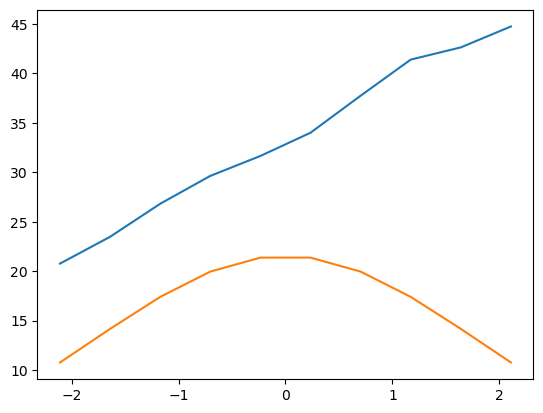

In [31]:
plt.plot(velocityrange_chisquared,lineflux.value[10:20])
plt.plot(velocityrange_chisquared,modelline(velocityrange_chisquared))

In [9]:
lineflux[10:20]

<VaryingResolutionOneDSpectrum [ 0.766901 , 3.4767308, 6.812543 ,
                                 9.625846 ,11.639635 ,13.986965 ,
                                17.725136 ,21.373215 ,22.608011 ,
                                24.718878 ] K>

In [10]:
modelline(velocityrange_chisquared)

<Quantity [16.19127653, 19.72730025, 22.87744805, 25.25229534, 26.53062622,
           26.53062622, 25.25229534, 22.87744805, 19.72730025, 16.19127653] K>

In [11]:
velocityrange_chisquared

<Quantity [-1.79105259, -1.3930409 , -0.99502921, -0.59701753, -0.19900584,
            0.19900584,  0.59701753,  0.99502921,  1.3930409 ,  1.79105259] km / s>